In [13]:
from google.colab import drive

drive.mount('/content/mydrive/')

Mounted at /content/mydrive/
Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).


In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.8.0
2.8.0


In [15]:
df_train = pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Code/Dataset/train.csv', header=None)
df_test = pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/Deep Learning/Homework_05/Code/Dataset/test.csv', header=None)

In [16]:
df_train_x = df_train.drop([500], axis=1)
df_train_y = df_train[500]
df_test_x = df_test.drop([500], axis=1)
df_test_y = df_test[500]

In [17]:
train_x = df_train_x.to_numpy()
train_y = df_train_y.to_numpy()

test_x = df_test_x.to_numpy()
test_y = df_test_y.to_numpy()

In [18]:
scaler = StandardScaler().fit(train_x)
train_x = scaler.transform(train_x)

In [19]:
scaler = StandardScaler().fit(test_x)
test_x = scaler.transform(test_x)

In [20]:
length = 500

my_gru = tf.keras.models.Sequential()

my_gru.add(tf.keras.layers.GRU(units = length, input_shape = (length,1)))
my_gru.add(tf.keras.layers.Dense(1000))
#my_rnn.add(tf.keras.layers.Dense(100))

my_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 500)               754500    
                                                                 
 dense (Dense)               (None, 1000)              501000    
                                                                 
Total params: 1,255,500
Trainable params: 1,255,500
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 500)               754500    
                                                                 
 dense_7 (Dense)             (None, 1000)              501000    
                                                                 
Total params: 1,255,500


In [21]:
x = my_gru.output
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
new_outputs = tf.keras.layers.Dense(12)(x)
new_outputs = tf.keras.activations.softmax(new_outputs)

In [22]:
#Constrauct the main model
model = tf.keras.models.Model(inputs = my_gru.inputs, outputs = new_outputs)
model.compile(loss = "sparse_categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_input (InputLayer)      [(None, 500, 1)]          0         
                                                                 
 gru (GRU)                   (None, 500)               754500    
                                                                 
 dense (Dense)               (None, 1000)              501000    
                                                                 
 dense_1 (Dense)             (None, 512)               512512    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256  

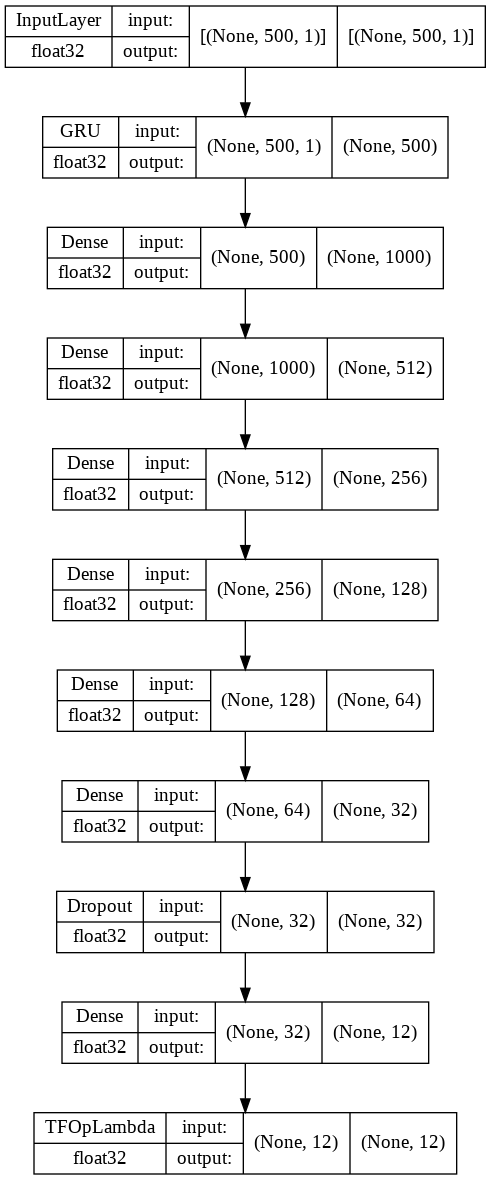

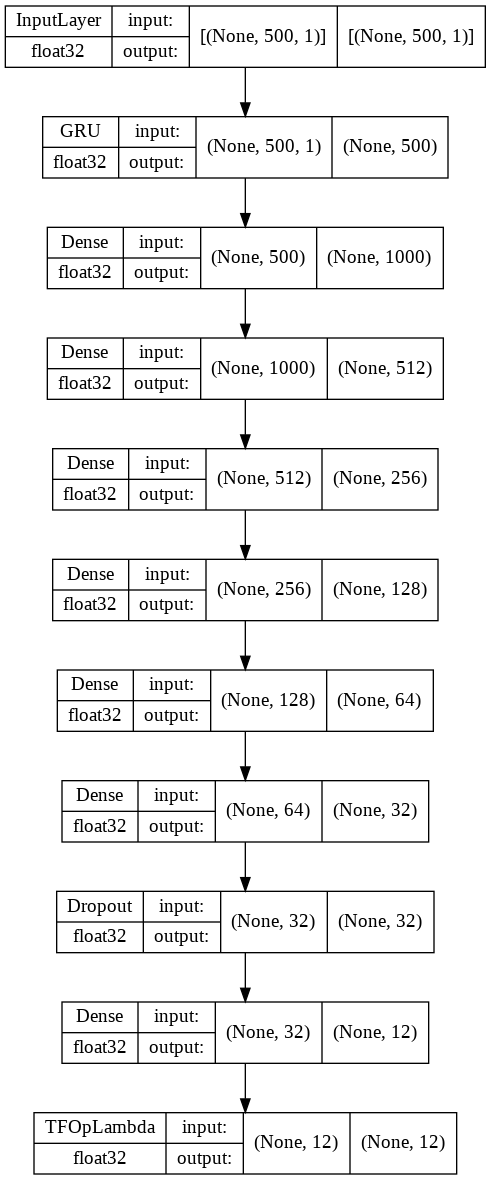

In [23]:
tf.keras.utils.plot_model(model, to_file = "cnn_functional.png", show_shapes = True, show_dtype = True, show_layer_names = False, dpi = 96)

In [28]:
#adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

#my_rnn.compile(loss = "sparse_categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])

checkpoint_filepath = "bestmodel.hdf5"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath, save_weight_only = False, monitor = "accuracy", mode="max", save_best_only = True,verbose=2)

In [29]:
hist = model.fit(train_x, train_y, batch_size = 100, epochs = 100, callbacks = [model_checkpoint_callback],validation_split = 0.2,verbose=1)

Epoch 1/100
51/51 [==============================] - ETA: 0s - loss: 2.1679 - accuracy: 0.1425
Epoch 1: accuracy improved from -inf to 0.14246, saving model to bestmodel.hdf5
51/51 [==============================] - 5s 101ms/step - loss: 2.1679 - accuracy: 0.1425 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/100
51/51 [==============================] - ETA: 0s - loss: 2.1681 - accuracy: 0.1572
Epoch 2: accuracy improved from 0.14246 to 0.15720, saving model to bestmodel.hdf5
51/51 [==============================] - 5s 101ms/step - loss: 2.1681 - accuracy: 0.1572 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/100
51/51 [==============================] - ETA: 0s - loss: 2.1635 - accuracy: 0.1523
Epoch 3: accuracy did not improve from 0.15720
51/51 [==============================] - 5s 98ms/step - loss: 2.1635 - accuracy: 0.1523 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/100
51/51 [==============================] - ETA: 0s - loss: 2.1665 - accuracy: 0.1521
Epoch 4: accura

In [31]:
model.load_weights('bestmodel.hdf5')

In [32]:
#Evaluation

results = model.evaluate(test_x, test_y, batch_size = 100)
print(f"{model.metrics_names}: {results}")

29/29 [==============================] - 1s 35ms/step - loss: nan - accuracy: 0.0850
['loss', 'accuracy']: [nan, 0.08495145291090012]
